<h1 align="center"><font size="5">Final Project: Data Analytics for House Pricing Data Set </font></h1> 

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>
</div>

</div>

<hr>


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 

## **Importing required libraries**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Module 1: Importing Data Set

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

In [5]:
# Type of data 
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# statistics about the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling

In [ ]:
df = df.drop(['id'])
df

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Module 3: Exploratory Data Analysis

### Question 3: Counting Unique Floor Values

In [10]:
fc = df['floors'].value_counts().to_frame()
print(fc)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


### Question 4: Boxplot of Houses with/without Waterfront View

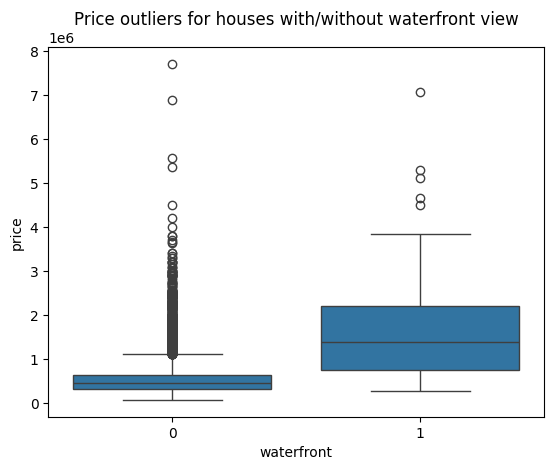

In [11]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price outliers for houses with/without waterfront view')
plt.show()

### Question 5: Correlation between sqft_above and price using Regplot

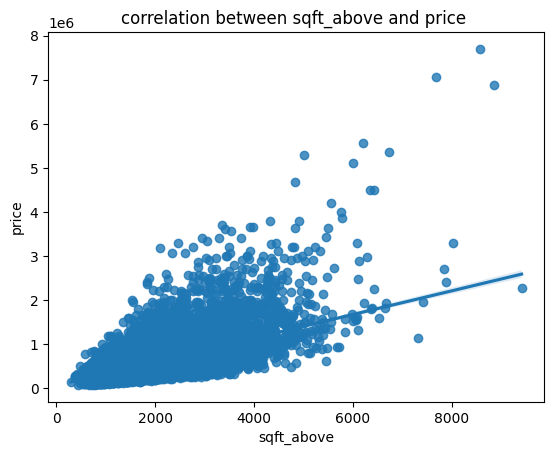

In [12]:
# Regplot for correlation between 'sqft_above' and 'price'
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('correlation between sqft_above and price ')
plt.show()

# Module 4: Model Development

### Question 6 

In [14]:
X = df[['sqft_living']]  # Independent variable (feature)
Y = df['price']          # Dependent variable (target)

In [15]:
#  Linear Regression model
lm = LinearRegression()

### Question 7

In [16]:
# Fitting the model using 'sqft_living' to predict 'price'
lm.fit(X, Y)

LinearRegression()

In [17]:
# the R² score
r2 = lm.score(X, Y)

In [18]:
#R² value
print("R² Score for sqft_living vs price: ", r2)

R² Score for sqft_living vs price:  0.4928532179037931


### Question 8

In [19]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]  # Features to predict the price
y = df['price']   # Target variable (price)

In [20]:
# list of tuples for the pipeline
pipeline_steps = [
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model', LinearRegression())
]

In [21]:
# pipeline object
pipeline = Pipeline(pipeline_steps)

In [22]:
# Fitting the pipeline to the data
pipeline.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [23]:
# predictions using the pipeline
y_pred = pipeline.predict(X)

In [24]:
#R² score
r2 = r2_score(y, y_pred)

In [25]:
print("R² Score: ", r2)

R² Score:  0.7513450279485017


# Module 5: Model Evaluation and Refinement

### Question 9

In [27]:
# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [28]:
print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

Number of test samples: 3242
Number of training samples: 18371


In [29]:
# Creating and fitting a Ridge regression model
ridge_model = Ridge(alpha=0.1)  # Setting regularization parameter to 0.1
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [30]:
y_pred = ridge_model.predict(x_test)

In [31]:
r2 = r2_score(y_test, y_pred)


In [32]:
# Print the R² value
print("R² Score for Ridge Regression: ", r2)

R² Score for Ridge Regression:  0.6480374087702245


### Question 10

In [35]:
#polynomial features (2nd order)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transforming the training and testing data
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Ridge regression model
ridge_model_poly = Ridge(alpha=0.1)  # regularization parameter: 0.1
ridge_model_poly.fit(X_train_poly, y_train)

# predictions
y_pred_poly = ridge_model_poly.predict(X_test_poly)

# R² score
r2_poly = r2_score(y_test, y_pred_poly)

#R² value
print("R² Score for Ridge Regression with Polynomial Features: ", r2_poly)

R² Score for Ridge Regression with Polynomial Features:  0.7004432063296435


### Author

[amalelmahraoui](https://github.com/almasstudyjourney)